In [1]:
 !pip install keras.utils 

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=b1b5a2299a7e9823fae4b7acf3b1c7c4e66c2ecded5fb482d353783888be6661
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


## import the required Libraries

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split


from keras.models import Model
from keras.layers import Input, Embedding, SpatialDropout1D, Dropout, Conv1D, MaxPool1D, Flatten, concatenate, Dense, \
    LSTM, Bidirectional, Activation, MaxPooling1D, Add, GRU, GlobalAveragePooling1D, GlobalMaxPooling1D, RepeatVector, \
    TimeDistributed, Permute, multiply, Lambda, add, Masking, BatchNormalization, Softmax, Reshape, ReLU, \
    ZeroPadding1D, subtract
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K
import tensorflow as tf
from keras import backend as K, initializers, regularizers, constraints


# Import our dependencies
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
from keras import backend as K
import keras.layers as layers
from keras.models import Model, load_model
from tensorflow.keras.layers import Layer, InputSpec
import numpy as np

from statistics import mode

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import tensorflow as tf

# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.keras.utils import metrics_utils
from tensorflow.python.ops import init_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.keras.utils.generic_utils import to_list
import tensorflow_hub as hub



import re
import nltk
from nltk.corpus import stopwords

# neural
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential

#Metrics 
from sklearn.metrics import balanced_accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

> ## **First Approach :** 
In this part of code, We are going to mix both Laptop and Restaurant Dataset in order to increase and to test the AEAT-LSTM ability to Distinguish between different aspects and their polarity, the model will be able to return the polarity based on the sentence and a given aspect , different aspects are input separately

### Load the Restaurant Dataset ( Dataframe ) 

> what we are going to do it to load both restaurant and laptop datasets, and then we will concatenate them in order to increase the size of our dataset

In [3]:
restaurant_df = pd.read_csv("../input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.csv", encoding='utf8')

## load the laptop dataset ( dataframe )

In [4]:
laptop_df = pd.read_csv("../input/semeval-2014-task-4-aspectbasedsentimentanalysis/Laptop_Train_v2.csv", encoding='utf8')

### the head of the dataframes 

> display the first rows of our both datasets

In [5]:
restaurant_df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145
...,...,...,...,...,...,...
3688,671,Each table has a pot of boiling water sunken i...,pot of boiling water,neutral,17,37
3689,671,Each table has a pot of boiling water sunken i...,meats,neutral,99,104
3690,671,Each table has a pot of boiling water sunken i...,vegetables,neutral,114,124
3691,671,Each table has a pot of boiling water sunken i...,rice,neutral,130,134


In [6]:
laptop_df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


### Concatenate the two dataframes so we can test the model on a different fields( Restaurant and Laptops)

In [59]:
#df = restaurant_df.append(laptop_df, ignore_index=True)
#df = restaurant_df
df = laptop_df

> display the dataset

In [60]:
#display the dataset
df

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,0,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,1,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,1,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,1,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,2,141,145
...,...,...,...,...,...,...
6046,2272,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,neutral,104,134
6047,2272,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,neutral,140,170
6048,848,"How Toshiba handles the repair seems to vary, ...",repair,conflict,24,30
6049,848,"How Toshiba handles the repair seems to vary, ...",repair,positive,130,136


In [61]:
from wordcloud import WordCloud 
wordcloud2 = WordCloud().generate(' '.join(df['Sentence'])),

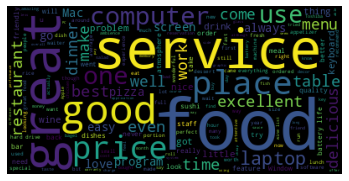

In [62]:
text3 = ' '.join(df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [63]:
## display the columns of the dataframe
df.columns

Index(['id', 'Sentence', 'Aspect Term', 'polarity', 'from', 'to'], dtype='object')

In [64]:
## display the null values in the polarity column
df['polarity'].isna().sum()

0

In [65]:
## change the labels to integers for the training phase
df['polarity'][df["polarity"] == 'negative'] = 0
df['polarity'][df["polarity"] == 'positive'] = 1
df['polarity'][df["polarity"] == 'neutral'] = 2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [66]:
df.head()

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,0,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,1,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,1,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,1,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,2,141,145


In [67]:
#Delete the useless Columns 
train_df = df.drop(['id','from','to'], axis = 1)

In [68]:
Aspects_term = train_df['polarity'].unique()
Aspects_term[:20]

array([0, 1, 2, 'conflict'], dtype=object)

In [69]:
train_df.head()

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


In [70]:
train_df[train_df.polarity == 'conflict']

,Sentence,Aspect Term,polarity
64,The food was delicious but do not come here on...,food,conflict
101,The service varys from day to day- sometimes t...,service,conflict
133,Though the Spider Roll may look like a challen...,Spider Roll,conflict
142,"An oasis of refinement: Food, though somewhat...",Food,conflict
172,"Food is usually very good, though ocasionally ...",Food,conflict
...,...,...,...
5372,"It had a seventeen inch screen which I wanted,...",seventeen inch screen,conflict
5409,While lacking some of the functions of the oth...,functions,conflict
5547,"Speakers don't get that loud, but good enough.",Speakers,conflict
5552,"Screen is crystal clear, yes it's small - but ...",Screen,conflict


In [71]:
## Delete the polarity than contains CONFLICT, Means that the sentence contains more than one sentiment when it comes to the aspect term
train_df.drop(train_df[train_df.polarity == 'conflict'].index, inplace = True)

In [72]:
## our new Dataframe
train_df

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2
...,...,...,...
6045,We also use Paralles so we can run virtual mac...,Windows 7 Home Premium,2
6046,We also use Paralles so we can run virtual mac...,Windows Server Enterprise 2003,2
6047,We also use Paralles so we can run virtual mac...,Windows Server 2008 Enterprise,2
6049,"How Toshiba handles the repair seems to vary, ...",repair,1


In [73]:
## Training data shape 
df.shape

(6051, 6)

<AxesSubplot:>

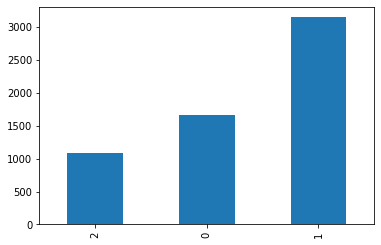

In [74]:
# Polarities distribution in our dataset
train_df.polarity.value_counts().sort_values().plot(kind = 'bar')


In [75]:
## Convert polarity Values to Integers 
train_df["polarity"] = pd.to_numeric(train_df["polarity"],errors='coerce')


In [76]:
## Display our training Dataframe 
train_df.head()

,Sentence,Aspect Term,polarity
0,But the staff was so horrible to us.,staff,0
1,"To be completely fair, the only redeeming fact...",food,1
2,"The food is uniformly exceptional, with a very...",food,1
3,"The food is uniformly exceptional, with a very...",kitchen,1
4,"The food is uniformly exceptional, with a very...",menu,2


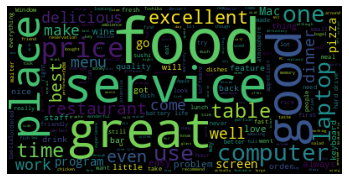

In [77]:
text3 = ' '.join(train_df['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [78]:
## drop the NAN Values from the dataframe
train_df.dropna(subset = ['polarity'], inplace = True)

In [79]:
## Verify if the dataframe contains any NAN Values
train_df.isna().sum()

Sentence       0
Aspect Term    0
polarity       0
dtype: int64

In [80]:
## Split the Dataset into Training and Testing Datasets
X_train, X_test, y_train, y_test = train_test_split(train_df,train_df['polarity'],stratify=train_df['polarity'], test_size=0.2, random_state=1)



In [81]:
# the size of the training dataset
X_train.Sentence.size

4732

In [82]:
# Display the shape of the target values!
y_train.shape

(4732,)

In [83]:
NUM_WORDS = 100000 ## MAx of words to keep, based on word frequency.
EMBEDDING_SIZE = 128 ## the length of the Vector the will 

## Embedding code

In [84]:
tokenizer = Tokenizer(num_words=NUM_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True, )
## Fit_on_texts : Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(list(X_train.Sentence))
text_X_train_tokenized = tokenizer.texts_to_sequences(X_train.Sentence) # list of tokenized sentences
Aspect_X_train_tokenized = tokenizer.texts_to_sequences(X_train['Aspect Term']) # list of tokenized sentences
text_X_test_tokenized = tokenizer.texts_to_sequences(X_test.Sentence) # list of tokenized sentences
Aspect_X_test_tokenized = tokenizer.texts_to_sequences(X_test['Aspect Term']) # list of tokenized sentences

In [85]:
##Maximum length of sentences
Max_Len =  max([len(one_title) for one_title in text_X_train_tokenized])
Max_Len

77

In [86]:
## Pads sequences(or sentences) to the same length.


text_X_train_padded = pad_sequences(text_X_train_tokenized, maxlen=Max_Len)
aspect_X_train_padded = pad_sequences(Aspect_X_train_tokenized, maxlen=1)

text_X_test_padded = pad_sequences(text_X_test_tokenized, maxlen=Max_Len)
aspect_X_test_padded = pad_sequences(Aspect_X_test_tokenized, maxlen=1)


In [87]:
## the embedding presentation of the aspects
aspect_X_train_padded[0]

array([77], dtype=int32)

In [88]:
## the embedding presentation of the Sentences

text_X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 168,  63,   1,  77, 262,  19, 263,  26, 269,  30,  35],
      dtype=int32)

In [89]:
## Concatenate the Embedding presentation of the sentences and aspects to Create training and testing dataset 
train_data =  [text_X_train_padded,aspect_X_train_padded]
test_data =   [text_X_test_padded,aspect_X_test_padded]

In [90]:
test_data[1][0]

array([728], dtype=int32)

## Attention Mechanism 

In [91]:

# modified based on `https://gist.github.com/cbaziotis/7ef97ccf71cbc14366835198c09809d2`
class Attention(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
 e: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None, W_constraint=None,
                 u_constraint=None, b_constraint=None, use_W=True, use_bias=False, return_self_attend=False,
                 return_attend_weight=True, **kwargs):
        self.supports_masking = True

        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.use_W = use_W
        self.use_bias = use_bias
        self.return_self_attend = return_self_attend    # whether perform self attention and return it
        self.return_attend_weight = return_attend_weight    # whether return attention weight
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        if self.use_W:
            self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),  initializer=self.init,
                                     name='{}_W'.format(self.name), regularizer=self.W_regularizer,
                                     constraint=self.W_constraint)
        if self.use_bias:
            self.b = self.add_weight(shape=(input_shape[1],), initializer='zero', name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer, constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],), initializer=self.init, name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer, constraint=self.u_constraint)
        
        super(Attention, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        if self.use_W:
            x = K.tanh(K.dot(x, self.W))

        ait = Attention.dot_product(x, self.u)
        if self.use_bias:
            ait += self.b

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        if self.return_self_attend:
            attend_output = K.sum(x * K.expand_dims(a), axis=1)
            if self.return_attend_weight:
                return [attend_output, a]
            else:
                return attend_output
        else:
            return a

    def compute_output_shape(self, input_shape):
        if self.return_self_attend:
            if self.return_attend_weight:
                return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[1])]
            else:
                return input_shape[0], input_shape[-1]
        else:
            return input_shape[0], input_shape[1]

    @staticmethod
    def dot_product(x, kernel):
        """
        Wrapper for dot product operation, in order to be compatible with both
        Theano and Tensorflow
        Args:
            x (): input
            kernel (): weights
        Returns:
        """
        if K.backend() == 'tensorflow':
            return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
        else:
            return K.dot(x, kernel)

## LSTM with Aspect Embedding

In [92]:
def ae_lstm(lstm_units = 512):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)
    
    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))
    
    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    aspect_embed = asp_embedding(input_aspect)
    
    
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden = LSTM(lstm_units)(input_concat)
    Dense_layer  = Dense(128, activation='relu')(hidden)
    output_layer = Dense(3, activation='softmax')(Dense_layer)
    return Model([input_text, input_aspect], output_layer)

In [93]:
ae_lstm_model = ae_lstm()
ae_lstm_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 77)]         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 128)       12800000    input_6[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 77, 128)      12800000    input_5[0][0]                    
____________________________________________________________________________________________

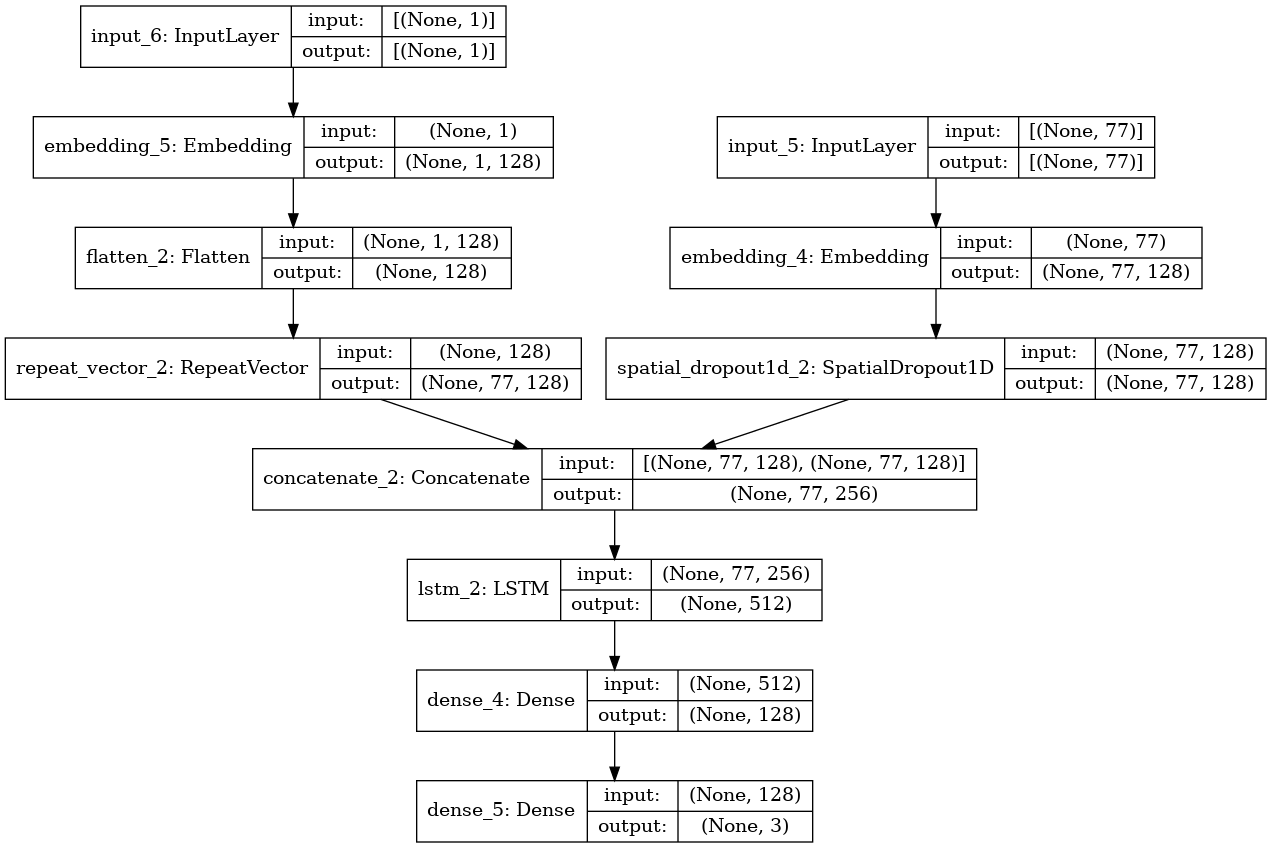

In [94]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(ae_lstm_model, to_file=dot_img_file, show_shapes=True)


In [95]:
y_train.size

4732

In [96]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
from tensorflow import keras

opt = keras.optimizers.Adam(learning_rate=0.01)

ae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
history =  ae_lstm_model.fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=16, epochs=20, callbacks = [learning_rate_reduction])

Epoch 1/20
296/296 [==============================] - 8s 22ms/step - loss: 1.0647 - accuracy: 0.5516 - val_loss: 0.9143 - val_accuracy: 0.5697
Epoch 2/20
296/296 [==============================] - 6s 21ms/step - loss: 0.8162 - accuracy: 0.6593 - val_loss: 0.9213 - val_accuracy: 0.6061
Epoch 3/20
296/296 [==============================] - 6s 21ms/step - loss: 0.6828 - accuracy: 0.7107 - val_loss: 1.0195 - val_accuracy: 0.5892

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 4/20
296/296 [==============================] - 6s 21ms/step - loss: 0.5023 - accuracy: 0.7937 - val_loss: 1.0278 - val_accuracy: 0.6052

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Epoch 5/20
296/296 [==============================] - 6s 21ms/step - loss: 0.4200 - accuracy: 0.8305 - val_loss: 1.0477 - val_accuracy: 0.6069
Epoch 6/20
296/296 [==============================] - 6s 21ms/step - loss: 0.4105 - accuracy: 0.8354 - val_loss: 1.0630 - v

In [47]:
text_X_test_padded[6].shape

(69,)

In [49]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
print(val_data[0].shape)
ae_lstm_model.predict(val_data)

(1, 69)


array([[4.2942955e-04, 9.9813569e-01, 1.4348208e-03]], dtype=float32)

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [51]:
print("Evaluate on test data")
results = ae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
23/23 [==============================] - 0s 6ms/step - loss: 1.0077 - accuracy: 0.6144
test loss, test acc: [1.0076905488967896, 0.6144244074821472]
Accuracy of the model is -  61.44244074821472 %


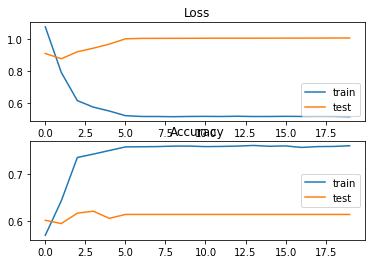

In [52]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

##  Attention-based LSTM (AT-LSTM)

In [53]:
def at_lstm(lstm_units = 512):
        input_text = Input(shape=(Max_Len,))
        input_aspect = Input(shape=(1,),)
        
        word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))
    
        asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence
        hidden_vecs = LSTM(lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask
        print(concat.shape)
         # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        Dense_layer  = Dense(128, activation='relu')(attend_hidden)
        output_layer = Dense(3, activation='softmax')(Dense_layer)
        return Model([input_text, input_aspect], output_layer)

In [54]:
at_lstm_model =  at_lstm()
at_lstm_model.summary()

(None, 69, 640)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 69)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 69, 128)      12800000    input_3[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 128)       12800000    input_4[0][0]                    
____________________________________________________________________________

## model training


In [55]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
opt = keras.optimizers.Adam(learning_rate=0.01)

at_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
at_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=10, callbacks = [learning_rate_reduction])

Epoch 1/10
91/91 [==============================] - 4s 29ms/step - loss: 1.0167 - accuracy: 0.5901 - val_loss: 0.9448 - val_accuracy: 0.6006
Epoch 2/10
91/91 [==============================] - 2s 22ms/step - loss: 0.9115 - accuracy: 0.6008 - val_loss: 0.9498 - val_accuracy: 0.6006

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 3/10
91/91 [==============================] - 2s 22ms/step - loss: 0.8756 - accuracy: 0.6008 - val_loss: 0.9562 - val_accuracy: 0.6006

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Epoch 4/10
91/91 [==============================] - 2s 22ms/step - loss: 0.8714 - accuracy: 0.6008 - val_loss: 0.9579 - val_accuracy: 0.6006

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.
Epoch 5/10
91/91 [==============================] - 2s 21ms/step - loss: 0.8712 - accuracy: 0.6008 - val_loss: 0.9581 - val_accuracy: 0.6006

Epoch 00005: ReduceLROnPlateau reducing learning ra

## Model Evaluation

In [57]:
val_data =   [text_X_test_padded[6].reshape(1,Max_Len),aspect_X_test_padded[6]]
at_lstm_model.predict(val_data)

array([[0.16717134, 0.73693866, 0.09589002]], dtype=float32)

In [58]:
print("Evaluate on test data")
results = at_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
23/23 [==============================] - 0s 6ms/step - loss: 0.9583 - accuracy: 0.6006
test loss, test acc: [0.9582774043083191, 0.6005547642707825]
Accuracy of the model is -  60.05547642707825 %


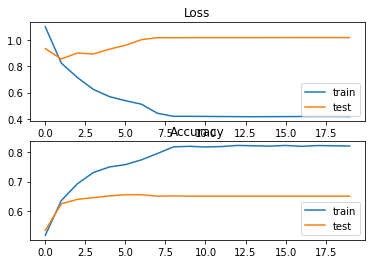

In [55]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

## Attention-based LSTM with Aspect Embedding (ATAE-LSTM)

In [97]:
# attention-based lstm with aspect embedding
def atae_lstm(lstm_units = 128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)
    
    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    print(input_concat.shape)
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    last_hidden_dense = Dense(lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)

In [98]:
atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()

(None, 77, 256)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 77)]         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 1, 128)       12800000    input_8[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 77, 128)      12800000    input_7[0][0]                    
____________________________________________________________________________

## Model Training

In [99]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=50, callbacks = [learning_rate_reduction])

Epoch 1/50
148/148 [==============================] - 5s 17ms/step - loss: 1.2316 - accuracy: 0.5526 - val_loss: 0.9880 - val_accuracy: 0.6112
Epoch 2/50
148/148 [==============================] - 2s 14ms/step - loss: 0.8568 - accuracy: 0.6648 - val_loss: 1.0846 - val_accuracy: 0.6205
Epoch 3/50
148/148 [==============================] - 2s 14ms/step - loss: 0.7008 - accuracy: 0.7859 - val_loss: 1.0936 - val_accuracy: 0.6526
Epoch 4/50
148/148 [==============================] - 2s 14ms/step - loss: 0.5763 - accuracy: 0.8481 - val_loss: 2.2155 - val_accuracy: 0.6915
Epoch 5/50
148/148 [==============================] - 2s 14ms/step - loss: 0.5937 - accuracy: 0.8626 - val_loss: 1.8488 - val_accuracy: 0.6061

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/50
148/148 [==============================] - 2s 14ms/step - loss: 0.5659 - accuracy: 0.7468 - val_loss: 1.7031 - val_accuracy: 0.6340

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.

## Model Evaluation

In [100]:
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
37/37 [==============================] - 0s 4ms/step - loss: 1.7249 - accuracy: 0.6500
test loss, test acc: [1.7249267101287842, 0.6500422358512878]
Accuracy of the model is -  65.00422358512878 %


> ## **Second Approach :** 
In this part of code, We are going to use the AspectCategory as a one hot_encoded output, the input of the model would the sentence and the output would be the probability for each aspect Category.

In [56]:
from collections import Counter
import time 
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
file_path = '../input/semeval-2014-task-4-aspectbasedsentimentanalysis/Restaurants_Train_v2.xml'

In [57]:
import xml.etree.ElementTree as ET


In [58]:
tree = ET.parse(file_path)
root = tree.getroot()

In [59]:
tags_list = [elem.tag for elem in root.iter()]
len(tags_list)

18551

In [60]:
aspect_categories = []
text = []
dfcols = ['Sentence', 'Aspect_Category', 'polarity' ]
for sentence in root.iter("sentences"):
    for aspect_category in sentence.iter("aspectCategory"):
            #print(type(abstract.text))
        aspect_categories.append(aspect_category.attrib)
    for txt in sentence.iter("text"):
        #print(type(abstract.text))
        text.append(txt.text) 

In [61]:
aspect_categories[0]['category']

'service'

In [62]:
ss = [pip['category'] for pip in aspect_categories]
set(ss)

{'ambience', 'anecdotes/miscellaneous', 'food', 'price', 'service'}

In [63]:
aspect_categories = []
text = []
dfcols = ['Sentence', 'Aspect_Category', 'polarity' ]
for sentence in root.iter("sentences"):
    for aspect in sentence.iter("aspectCategories"):
        aspects = []
        for aspect_category in aspect.iter("aspectCategory"):
            #print(type(abstract.text))
            aspects.append(aspect_category.attrib)
        aspect_categories.append(aspects)
    for txt in sentence.iter("text"):
        #print(type(abstract.text))
        text.append(txt.text) 
listt = []
category_list = []
polarity_list = []
for aspects in aspect_categories: 
    listt = []
    category_list.append(listt)
    for aspect in aspects: 
        listt.append(aspect['category'])
        
for polarities in aspect_categories: 
    listt = []
    polarity_list.append(listt)
    for aspect in polarities: 
        listt.append(aspect['polarity'])
        
dataframe_list = list(zip(text,category_list,polarity_list))
df_xml = pd.DataFrame(dataframe_list,columns=dfcols)
# df_xml['Diseases']
# countt.append(2)
#print(NameOfSubstance.text)
#./PubmedArticleSet/PubmedArticle/MeshHeadingList/MeshHeading/DescriptorName

In [64]:
df_xml['hot_enocded'] = pd.NaT
 

In [65]:
df_xml['hot_enocded'] = df_xml['hot_enocded'].astype('object')
for i in np.arange(3041):
    df_xml.at[i, 'hot_enocded'] =  [3,3,3,3,3]

In [66]:
df_xml

,Sentence,Aspect_Category,polarity,hot_enocded
0,But the staff was so horrible to us.,[service],[negative],"[3, 3, 3, 3, 3]"
1,"To be completely fair, the only redeeming fact...","[food, anecdotes/miscellaneous]","[positive, negative]","[3, 3, 3, 3, 3]"
2,"The food is uniformly exceptional, with a very...",[food],[positive],"[3, 3, 3, 3, 3]"
3,Where Gabriela personaly greets you and recomm...,[service],[positive],"[3, 3, 3, 3, 3]"
4,"For those that go once and don't enjoy it, all...",[anecdotes/miscellaneous],[positive],"[3, 3, 3, 3, 3]"
...,...,...,...,...
3036,But that is highly forgivable.,[anecdotes/miscellaneous],[positive],"[3, 3, 3, 3, 3]"
3037,"From the appetizers we ate, the dim sum and ot...",[food],[positive],"[3, 3, 3, 3, 3]"
3038,"When we arrived at 6:00 PM, the restaurant was...",[anecdotes/miscellaneous],[neutral],"[3, 3, 3, 3, 3]"
3039,Each table has a pot of boiling water sunken i...,[food],[neutral],"[3, 3, 3, 3, 3]"


In [67]:
from wordcloud import WordCloud 
wordcloud2 = WordCloud().generate(' '.join(df_xml['Sentence'])),

In [68]:
wordcloud2 = WordCloud().generate(' '.join(df_xml['Sentence'])),

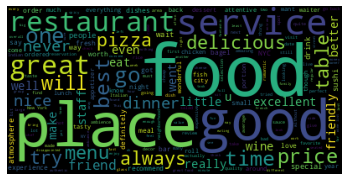

In [69]:
text3 = ' '.join(df_xml['Sentence'])
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## data preparation

### the Idea here is to create an output the contains all the aspects and their polarities, for example if the aspect concerned is in the sentence, the model output needs to be 1 ( if the polarity is positive) 0 if the polarity is negative and 2 if the sentence doesn't contain the aspect.

In [70]:
#{'ambience', 'anecdotes/miscellaneous', 'food', 'price', 'service'}

#initialize the target aspects as absents in the sentence, and whenever we find an aspect in the data we'll replace it by it's polarity
aspects_terget_data = [2,2,2,2,2]
for i in np.arange(3041) : 
    for aspect in np.arange(len(df_xml.Aspect_Category[i])):
        if 'service' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'positive' : 
                df_xml.hot_enocded[i][0] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'negative' : 
                df_xml.hot_enocded[i][0] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('service')] == 'neutral' : 
                df_xml.hot_enocded[i][0] = 2
        if 'anecdotes/miscellaneous' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'positive' : 
                df_xml.hot_enocded[i][1] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'negative' : 
                df_xml.hot_enocded[i][1] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('anecdotes/miscellaneous')] == 'neutral' : 
                df_xml.hot_enocded[i][1] = 2
        if 'food' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'positive' : 
                df_xml.hot_enocded[i][2] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'negative' : 
                df_xml.hot_enocded[i][2] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('food')] == 'neutral' : 
                df_xml.hot_enocded[i][2] = 2
        if 'price' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'positive' : 
                df_xml.hot_enocded[i][3] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'negative' : 
                df_xml.hot_enocded[i][3] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('price')] == 'neutral' : 
                df_xml.hot_enocded[i][3] = 2
        if 'ambience' in df_xml.Aspect_Category[i]:
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'positive' : 
                df_xml.hot_enocded[i][4] = 1
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'negative' : 
                df_xml.hot_enocded[i][4] = 0
            if df_xml.polarity[i][df_xml.Aspect_Category[i].index('ambience')] == 'neutral' : 
                df_xml.hot_enocded[i][4] = 2


In [71]:
df_xml

,Sentence,Aspect_Category,polarity,hot_enocded
0,But the staff was so horrible to us.,[service],[negative],"[0, 3, 3, 3, 3]"
1,"To be completely fair, the only redeeming fact...","[food, anecdotes/miscellaneous]","[positive, negative]","[3, 0, 1, 3, 3]"
2,"The food is uniformly exceptional, with a very...",[food],[positive],"[3, 3, 1, 3, 3]"
3,Where Gabriela personaly greets you and recomm...,[service],[positive],"[1, 3, 3, 3, 3]"
4,"For those that go once and don't enjoy it, all...",[anecdotes/miscellaneous],[positive],"[3, 1, 3, 3, 3]"
...,...,...,...,...
3036,But that is highly forgivable.,[anecdotes/miscellaneous],[positive],"[3, 1, 3, 3, 3]"
3037,"From the appetizers we ate, the dim sum and ot...",[food],[positive],"[3, 3, 1, 3, 3]"
3038,"When we arrived at 6:00 PM, the restaurant was...",[anecdotes/miscellaneous],[neutral],"[3, 2, 3, 3, 3]"
3039,Each table has a pot of boiling water sunken i...,[food],[neutral],"[3, 3, 2, 3, 3]"


## Attention-based LSTM with Aspect Embedding (ATAE-LSTM)

In [57]:
# attention-based lstm with aspect embedding
def atae_lstm(lstm_units = 128):
    input_text = Input(shape=(Max_Len,))
    input_aspect = Input(shape=(1,),)
    
    word_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)
    text_embed = SpatialDropout1D(0.2)(word_embedding(input_text))

    asp_embedding = Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=Max_Len)

    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(Max_Len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    print(input_concat.shape)
    hidden_vecs, state_h, _ = LSTM(lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(lstm_units)(attend_hidden)
    last_hidden_dense = Dense(lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)

In [58]:
atae_lstm_model =  atae_lstm()
atae_lstm_model.summary()

(None, 77, 256)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 77)]         0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 128)       12800000    input_6[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 77, 128)      12800000    input_5[0][0]                    
____________________________________________________________________________

In [59]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                    patience = 1,
                                                    verbose=1,
                                                    factor=0.1,
                                                    min_lr=0.000001)
atae_lstm_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
atae_lstm_model .fit(x = train_data, y = y_train,validation_data = (test_data, y_test), batch_size=32, epochs=50, callbacks = [learning_rate_reduction])

Epoch 1/50
148/148 [==============================] - 4s 18ms/step - loss: 1.1045 - accuracy: 0.5492 - val_loss: 0.9428 - val_accuracy: 0.6281
Epoch 2/50
148/148 [==============================] - 2s 14ms/step - loss: 0.7988 - accuracy: 0.7225 - val_loss: 0.8943 - val_accuracy: 0.6340
Epoch 3/50
148/148 [==============================] - 2s 14ms/step - loss: 0.7356 - accuracy: 0.7521 - val_loss: 1.3677 - val_accuracy: 0.6543
Epoch 4/50
148/148 [==============================] - 2s 14ms/step - loss: 0.5776 - accuracy: 0.7959 - val_loss: 1.7068 - val_accuracy: 0.6348

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/50
148/148 [==============================] - 2s 14ms/step - loss: 0.4899 - accuracy: 0.7959 - val_loss: 1.3532 - val_accuracy: 0.6602
Epoch 6/50
148/148 [==============================] - 2s 14ms/step - loss: 0.4368 - accuracy: 0.8402 - val_loss: 1.5128 - val_accuracy: 0.6636
Epoch 7/50
148/148 [==============================] - 2s 14m

In [62]:
print("Evaluate on test data")
results = atae_lstm_model.evaluate(x = test_data , y = y_test )
print("test loss, test acc:", results)
print("Accuracy of the model is - " , results[1]*100 , "%")

Evaluate on test data
37/37 [==============================] - 0s 4ms/step - loss: 2.1119 - accuracy: 0.6855
test loss, test acc: [2.111868381500244, 0.6855452060699463]
Accuracy of the model is -  68.55452060699463 %


In [60]:
val_data =   [text_X_test_padded[6].reshape(1,69),aspect_X_test_padded[6].reshape(1,69)]
ae_lstm_model.predict(test_data)

ValueError: cannot reshape array of size 77 into shape (1,69)

In [ ]:

# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context


## attention-based lstm

In [ ]:
def at_lstm(self):
        input_text = Input(shape=(self.max_len,))
        input_aspect = Input(shape=(1,),)
        asp_embedding = Embedding(input_dim=self.aspect_embeddings.shape[0],
                                      output_dim=self.config.aspect_embed_dim,
                                      trainable=self.config.aspect_embed_trainable)
        aspect_embed = asp_embedding(input_aspect)
        aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
        repeat_aspect = RepeatVector(self.max_len)(aspect_embed)  # repeat aspect for every word in sequence

        hidden_vecs = LSTM(self.config.lstm_units, return_sequences=True)(text_embed)  # hidden vectors output by lstm
        concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)  # mask after concatenate will be same as hidden_out's mask

        # apply attention mechanism
        attend_weight = Attention()(concat)
        attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
        attend_hidden = multiply([hidden_vecs, attend_weight_expand])
        attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)
        return Model([input_text, input_aspect], attend_hidden)

## attention-based lstm with aspect embedding

In [ ]:
# attention-based lstm with aspect embedding
def atae_lstm(self):
    input_text = Input(shape=(self.max_len,))
    input_aspect = Input(shape=(1,), )
    asp_embedding = Embedding(input_dim=self.aspect_embeddings.shape[0],
                                  output_dim=self.config.aspect_embed_dim,
                                  trainable=self.config.aspect_embed_trainable)
    aspect_embed = asp_embedding(input_aspect)
    aspect_embed = Flatten()(aspect_embed)  # reshape to 2d
    repeat_aspect = RepeatVector(self.max_len)(aspect_embed)  # repeat aspect for every word in sequence

    input_concat = concatenate([text_embed, repeat_aspect], axis=-1)
    hidden_vecs, state_h, _ = LSTM(self.config.lstm_units, return_sequences=True, return_state=True)(input_concat)
    concat = concatenate([hidden_vecs, repeat_aspect], axis=-1)

    # apply attention mechanism
    attend_weight = Attention()(concat)
    attend_weight_expand = Lambda(lambda x: K.expand_dims(x))(attend_weight)
    attend_hidden = multiply([hidden_vecs, attend_weight_expand])
    attend_hidden = Lambda(lambda x: K.sum(x, axis=1))(attend_hidden)

    attend_hidden_dense = Dense(self.config.lstm_units)(attend_hidden)
    last_hidden_dense = Dense(self.config.lstm_units)(state_h)
    final_output = Activation('tanh')(add([attend_hidden_dense, last_hidden_dense]))

    return Model([input_text, input_aspect], final_output)
